In [2]:
import nltk
from nltk import word_tokenize

In [3]:
text = "And now for something completely different"

In [4]:
words = word_tokenize(text)

In [5]:
nltk.pos_tag(words)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [6]:
text2 = word_tokenize("They refuse to permit us to obtain the permit")


In [7]:
nltk.pos_tag(text2)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('permit', 'NN')]

In [8]:
text3 = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [9]:
text3

<Text: the fulton county grand jury said friday an...>

In [10]:
text3.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [11]:
text3.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [12]:
text3.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [13]:
text3.similar('the')

a his this their its her an that our any all one these my in your no
some other and


# Corpora etiquetados
Un corpora etiquetado consiste en un string donde cada palabra viene acompañada de su etiqueta POS

In [14]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.
... '''

In [15]:
# la función str2tuple nos permite separar un string en una tupla (palabra, etiqueta)
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

In [16]:
#nltk nos permite leer los corpora ya etiquetados y manipularlos fácilmente
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [25]:
#La función tagged_words nos permite usar differentes conjuntos de etiquetas
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [18]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [19]:
#Cuáles son las etiquetas más comunes en un corpus
from nltk.corpus import brown

In [21]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [22]:
tag_fd = nltk.FreqDist(tag for (word,tag) in brown_news_tagged)

In [23]:
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

# EJERCICIO:

**Haz un gráfico de frecuencia acumulada de la distribución de frecuencia que acabamos de construir**

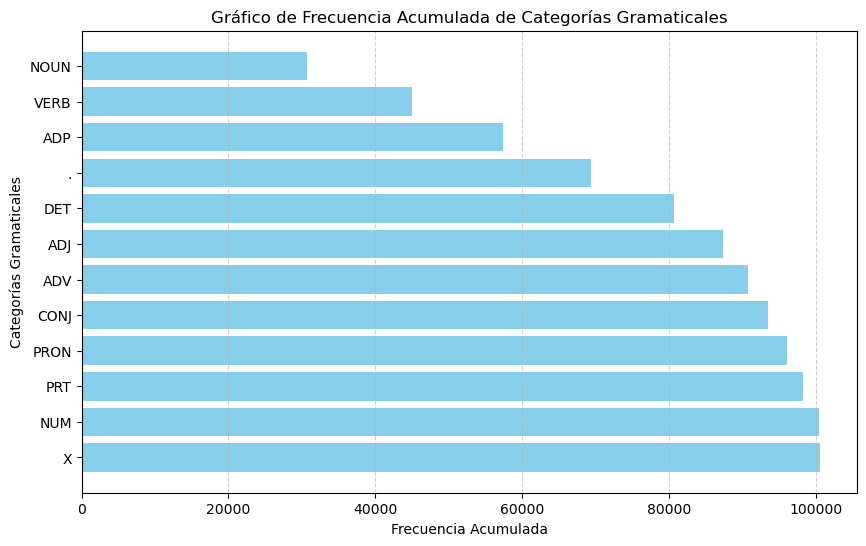

In [24]:
import matplotlib.pyplot as plt

# Los datos proporcionados
data = [('NOUN', 30654),
        ('VERB', 14399),
        ('ADP', 12355),
        ('.', 11928),
        ('DET', 11389),
        ('ADJ', 6706),
        ('ADV', 3349),
        ('CONJ', 2717),
        ('PRON', 2535),
        ('PRT', 2264),
        ('NUM', 2166),
        ('X', 92)]

# Calcular la frecuencia acumulada
cumulative_freq = [data[0][1]]
for i in range(1, len(data)):
    cumulative_freq.append(cumulative_freq[-1] + data[i][1])

# Categorías gramaticales
categories = [item[0] for item in data]

# Gráfico de frecuencia acumulada
plt.figure(figsize=(10, 6))
plt.barh(categories, cumulative_freq, color='skyblue')
plt.xlabel('Frecuencia Acumulada')
plt.ylabel('Categorías Gramaticales')
plt.title('Gráfico de Frecuencia Acumulada de Categorías Gramaticales')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la categoría más frecuente en la parte superior
plt.show()


In [ ]:
#POS tagging nos permite buscar y encontrar "el contexto" en el que aparecen algunas palabras

word_tag_pairs = nltk.bigrams(brown_news_tagged)

In [ ]:
noun_preceders = [a[1] for (a,b) in word_tag_pairs if b[1]== 'NOUN']

In [ ]:
noun_preceders

In [ ]:
fdist = nltk.FreqDist(noun_preceders)
fdist.most_common()

In [ ]:
# Podemos encontrar los verbos más comunes en un corpora
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for (wt,_) in word_tag_fd.most_common() if wt[1] == 'VERB']

In [ ]:
#Podemos usar el primer elemento en el par (word, tag) como una condición para crear una
#distribución de frecuecia condicional
cfd1 = nltk.ConditionalFreqDist(wsj)

In [ ]:
cfd1['yield'].most_common()

In [ ]:
cfd1['cut'].most_common()

In [ ]:
# si ordenamos los pares al revés (tag, word) podemos ver
# qué palabras son las más usuales para una etiqueta
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag,word) for (word,tag) in wsj)
list(cfd2['VBN'])

In [ ]:
cfd3 = nltk.ConditionalFreqDist(wsj)

In [ ]:
# Qué verbos se escriben igual en pasado y en participio pasado

[w for w in cfd3.conditions() if 'VBD' in cfd3[w] and 'VBN' in cfd3[w]]

In [ ]:
cfd3['named'].most_common()

In [ ]:
# Podemos examinar "el contexto" de los verbos que se escriben igual en pasado que en participio pasado

idx1 = wsj.index(('kicked','VBD'))
wsj[idx1-4:idx1+2]

In [ ]:
idx2 = wsj.index(('kicked','VBN'))
wsj[idx2-4:idx2+2]

# EJERCICIO:

**Repite este proceso para 'named', 'used' y 'caused'**

***¿Qué conclusiones podemos obtener?***

In [ ]:
# Podemos encontrar las diferentes categorías de sustantivos usando un tagset más elaborado

def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag,word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag,cfd[tag].most_common(5)) for tag in cfd.conditions())

In [ ]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [ ]:
for tag in sorted(tagdict):
    print(tag,tagdict[tag])

In [ ]:
# podemos explorar cómo se usan algunas palabras en un corpus
brown_learned_text = brown.words(categories='learned')

In [ ]:
sorted(set(b for (a,b) in nltk.bigrams(brown_learned_text) if a == 'often'))

In [ ]:
# las etiquetas hacen más fácil esta tarea
brown_lrnd_tagged = brown.tagged_words(categories='learned',tagset='universal')

In [ ]:
tags = [ b[1] for (a,b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']

In [ ]:
fd = nltk.FreqDist(tags)
fd.tabulate()

In [ ]:
# Buscamos frases con la forma 'VERB' to 'VERB'

from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence): 
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

In [ ]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

In [ ]:
# Revisamos algunas palabras que son muy ambiguas en cuanto a su uso dentro del lenguaje
# ambiguas significa que pueden tener muchas etiquetas POS diferentes
# revisando el contexto de cada etiqueta podemos entender mejor porqué es ambigua cada palabra

brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag) for (word, tag) in brown_news_tagged)

for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

# EJERCICIO:

**Utiliza el índice en la lista de palabras etiquetadas para revisar los contextos donde aparece cada una de las etiquetas de las palabras encontradas**